In [2]:
from onion_one import onion_articles 
from satirewire_data import satire_wire_articles
from squib_data import squib_1_articles
from squib_2_data import squib_2_articles 
import re
import pdb
import nltk
import string
import numpy as np
import pandas as pd
from nltk.collocations import *
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, FreqDist
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

In [4]:
pd.set_option("display.max_rows", 2000)

### steps

- clean onion (check)
- clean satirewire
- clean squib

### notes

> following "articles are ~30 words each
- remove onion_df.iloc[2,1] ?
- remove onion_df.iloc[25,1] ?
- remove onion_df.iloc[26,1] ?


-------------------

### clean onion

In [5]:
print(len(onion_articles))
print(len(satire_wire_articles))
print(len(squib_1_articles))
print(len(squib_2_articles))

47
324
180
699


In [6]:
onion_arts = [l.pop(0) for l in onion_articles]

In [8]:
len(onion_articles)

47

In [9]:
cleaned_onions = [x for x in onion_articles if x]

In [85]:
# len(cleaned_onions)

In [10]:
cleaned_onions[0][1]

'WASHINGTON—Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-old Gregory Birch of Naperville, IL echoing the concerns of 323 million Americans in also noting that the country was only now truly beginning to reintegrate former national security advisor Michael Flynn. “This is just not sustainable. I’d say we can handle maybe one or two more former members of Trump’s inner circle over the remainder of the year, but that’s it. This country has its limits.” The U.S. populace confirmed that they could not handle all of these pieces of shit trying to rejoin society at once.'

In [13]:
# cleaned_onions.iloc[:,1]

In [14]:
def clean_onion_header(dirty_string):
    sep = "—"
    if sep in dirty_string:
        clean = dirty_string.split(sep, 1)[1]
    else:
        clean = dirty_string
    return clean

In [15]:
recleaned_onions = []

for i in range(0, len(cleaned_onions)):
    x = clean_onion_header(cleaned_onions[i][1])
    recleaned_onions.append(x)

In [16]:
recleaned_onions

['Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-old Gregory Birch of Naperville, IL echoing the concerns of 323 million Americans in also noting that the country was only now truly beginning to reintegrate former national security advisor Michael Flynn. “This is just not sustainable. I’d say we can handle maybe one or two more former members of Trump’s inner circle over the remainder of the year, but that’s it. This country has its limits.” The U.S. populace confirmed that they could not handle all of these pieces of shit trying to rejoin society at once.',
 'Desperate to unwind after months of nonstop work investigating Russian influence in t

In [20]:
# onion_df = pd.DataFrame(recleaned_onions)
# onion_df.columns = ['body']
pd.set_option('max_colwidth',400)
onion_df

,body
0,"Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-o..."
1,"Desperate to unwind after months of nonstop work investigating Russian influence in the 2016 election, visibly exhausted Special Counsel Robert Mueller powered his phone down Friday in order to give himself a break from any news concerning the probe over the holiday break. “The last thing I want when I’m spending time with my family is a cascade of push notifications telling me yet another Rus..."
2,"Nearly halfway through his presidential term, Donald Trump has continued to exist in a perpetual state of controversy, and 2018 provided no shortage of outrageous moments. The Onion looks back at the most significant events in the Trump presidency in 2018."
3,"Attempting to make amends for gross abuses of power during his time as Interior Department Secretary, an unusually contrite Ryan Zinke apologized Monday for misusing government funds by sending the members of the ethics committee a $160,000 vase. “I know this doesn’t change anything about how I exploited my cabinet position, but I hope you will accept this beautiful example of Qing dynasty por..."
4,"Decrying the Senate’s resolution blaming the crown prince for the brutal torture and murder of journalist Jamal Khashoggi as “a cruel, inhumane, and unprecedented interference into a sovereign kingdom’s internal affairs,” the Trump administration launched a human rights investigation Monday into the Senate’s harsh treatment of Saudi ruler Mohammad bin Salman. “We are looking into the deeply tr..."
5,"Following sentencing for his role in a hush-money scandal, Michael Cohen was granted a prison work release for a new job with the Trump 2020 campaign, sources confirmed Wednesday. “We’re confident that engaging in honest work will help Mr. Cohen with his rehabilitation,” said warden Pete Clements, telling reporters that having an opportunity to give back to society by serving as an advisor for..."
6,"Grimacing and clutching at his shoulder, Fox NFL announcer Joe Buck tore his rotator cuff after an awkward throw down to the sideline during the second quarter of the Buccaneers vs. Cowboys game. “You hate to see an announcer go down like that. Especially on such a routine throw down to Erin to check the field conditions. He’s made that throw a thousand times,” said commentator Troy Aikman, ad..."
7,"Categorically denying allegations that the tactic was unconstitutional and unfairly targeted players who protested the national anthem, NFL commissioner Roger Goodell released a statement Sunday defending the NFL’s right to subject Panthers safety Eric Reid to random stop-and-frisk searches. “We’re simply trying to keep the game clean and provide a safe environment that benefits all our player..."
8,"Quashing rumors that the team was looking to make an early exit for Las Vegas, the Oakland Raiders announced plans Wednesday to play the entirety of their 2019 home schedule in Head Coach Jon Gruden’s backyard. “This is really the perfect venue for this this team—in fact, I think playing in my yard will provide a unique home field advantage like nowhere else in the league,” said Gruden, adding..."
9,"Claiming it was the most humane way to deal with their suffering fans, the Cleveland Browns announced Tuesday that they had euthanized the entirety of the Dawg Pound following a rabies outbreak. “They were a part of our Browns family, and we’re heartbroken over cutting their lives short, but putting them down was the only option,” said team owner Jimmy Haslam, who revealed the Browns’ concern ..."


In [87]:
# test_case = onion_df.iloc[4][1]
# onion_df.columns = ['body']
# onion_df.head() 

------

### clean satirewire

In [160]:
# satire_wire_articles[8]

In [103]:
# def remove_satirewire_footer(dirty_string): 
#     sep = "SatireWire.com Related Tags:"
#     if sep in dirty_string:
#         clean = dirty_string.split(sep, 1)[0]
#     else:
#         clean = dirty_string
#     return clean 

# onion_df[1] = onion_df[1].map(remove_dates)
# onion_df.head()

In [ ]:
# sep = "(SatireWire.com) – "

# def clean_articles(dirty_string, sep, ind): 
#     if sep in dirty_string:
#         clean = dirty_string.split(sep, 1)[ind]
#     else:
#         clean = dirty_string
#     return clean 

In [177]:
def remove_satirewire_header(dirty_string): 
    sep = "(SatireWire) — "
    if sep in dirty_string:
        clean = dirty_string.split(sep, 1)[1]
    else:
        clean = dirty_string
    return clean 

In [150]:
cleaned_satirewire_head = []

for i in range(0, len(satire_wire_articles)):
    x = remove_satirewire_header(satire_wire_articles[i][2])
    cleaned_satirewire_head.append(x)

In [178]:
# second and thrid header clean for diff character

cleaned_satirewire_head4 = []

for i in range(0, len(cleaned_satirewire_head3)):
    x = remove_satirewire_header(cleaned_satirewire_head3[i])
    cleaned_satirewire_head4.append(x)

In [193]:
# cleaned_satirewire_head4[50:]

In [165]:
def remove_satirewire_footer(dirty_string): 
    sep = "© "
    if sep in dirty_string:
        clean = dirty_string.split(sep, 1)[0]
    else:
        clean = dirty_string
    return clean 

In [166]:
# cleaned_satirewire_head

In [167]:
cleaned_satirewire_foot = []

for i in range(0, len(satire_wire_articles)):
    x = remove_satirewire_footer(cleaned_satirewire_head[i])
    cleaned_satirewire_foot.append(x)

In [168]:
cleaned_satirewire_foot

['White House officials today said President Trump’s claim that his handling of Hurricane Maria was a “tremendous success” was a reference to Alternative Puerto Rico, a land where 3,000 people didn’t die and no one is still homeless and 1.1 million people got immediate FEMA help. “Look, people can criticize the President for his response to the disaster on Puerto Rico, but that viewpoint ignores the reality of an Alternative Puerto Rico where none of that bad stuff happened, and that’s what President Trump was referring to when he said his response was amazing,” said Press Secretary Sarah Huckabee Sanders. “And it was amazing. The President did an incredible job, and if you’d bother to go out and find some everyday Alternative Puerto Ricans, I bet you they would agree.” Reporters immediately questioned the existence of Alternative Puerto Rico, but Huckabee Sanders was unswayed. “As this White House has consistently said, for every fact there is an alternative fact,” she said. “There ma

In [154]:
# cleaned_satirewire_complete = []

# for i in range(0, len(satire_wire_articles)):
#     x = remove_satirewire_footer(cleaned_satirewire_head[i])
#     cleaned_satirewire_complete.append(x)

In [156]:
# cleaned_satirewire_complete

In [147]:
# satire_wire_articles[2][2]

In [138]:
# cleaned_satirewire_foot[8]

In [99]:
# satire_pd = pd.DataFrame(satire_wire_articles)
# satire_pd.drop([1], axis=1, inplace=True)
# # satire_pd.head() 
# satire_pd.iloc[4][2]
# satire_pd[2] = satire_pd[2].map(remove_footer)
# satire_pd.head()
# satire_pd.iloc[10][2]
# satire_pd.columns = ['headline', 'body']
# satire_pd.loc[2] 

In [ ]:
new_satirewire_df

----

### clean squib

In [11]:
squib_articles = squib_1_articles + squib_2_articles

In [184]:
squib_df = pd.DataFrame(squib_articles)
# squib_df.head() 
# squib_df.iloc[3][1]

In [190]:
# squib_df = squib_df.drop(columns=[0])
squib_df.columns = ['body']
squib_df.loc[109]

body    F ootball has taken a dramatic twist from bein...
Name: 109, dtype: object

In [36]:
# squib_df.head()
# onion_df.head()
# satire_pd
# all_satire_df = onion_df.append([squib_df, satire_pd])
# all_satire_df = all_satire_df.drop_duplicates()
# all_satire_df['target'] = 1
# all_satire_df.head() 
# all_satire_b = all_satire_df.drop(['headline'], axis=1)
all_satire_b.shape

(1230, 4)

In [44]:
squib_articles = squib_1_articles + squib_2_articles

In [45]:
len(squib_articles)

879

In [16]:
all_satire_articles = squib_articles + onion_articles + satire_wire_articles

---------

In [117]:
reuters_df = pd.read_csv('reuters_clean.csv')
reuters_df.drop(['Unnamed: 0'], axis=1, inplace=True)
reuters_df.head() 


,body,target
0,"Swimming enthusiast Yu Hongtao, 50, trained f...",0
1,North Korean leader Kim Jong Un and Chinese P...,0
2,Indonesia will launch a renewed search effort...,0
3,Myanmar government leader Aung San Suu Kyi di...,0
4,France plans to introduce legislation to toug...,0


In [118]:
mega_data = all_satire_b.append(reuters_df)

In [205]:
wed_df.shape

(2128, 2)

In [207]:
text_test = wed_df.iloc[0][0]
# ' '.join(text_test.split()[:100])
text_test

'Noting that the resignation of James Mattis as Secretary of Defense marked the ouster of the third top administration official in less than three weeks, a worried populace told reporters Friday that it was unsure how many former Trump staffers it could safely reabsorb. “Jesus, we can’t just take back these assholes all at once—we need time to process one before we get the next,” said 53-year-old Gregory Birch of Naperville, IL echoing the concerns of 323 million Americans in also noting that the country was only now truly beginning to reintegrate former national security advisor Michael Flynn. “This is just not sustainable. I’d say we can handle maybe one or two more former members of Trump’s inner circle over the remainder of the year, but that’s it. This country has its limits.” The U.S. populace confirmed that they could not handle all of these pieces of shit trying to rejoin society at once.'

In [144]:
def limit_body(string):
    return ' '.join(text_test.split()[:100])

In [308]:
data_reindexed.shape


(2128, 2)

In [309]:
data_reindexed.to_csv("clean_set.csv")

### making dataframe to model from

In [199]:
wed_df = pd.read_csv('clean_set.csv', index_col=0)

In [261]:
wed_df = wed_df.dropna()

In [234]:
data = wed_df['body']
target = wed_df['target']

In [292]:
sw_list = stopwords.words('english')
sw_list += list(string.punctuation)
sw_list += ["''", '""', '...', '``', '’', '“', '’', '”', '‘', '‘', 'said', 'one', 'com', 'satirewire', '-', '–', '—', 'satirewire.com']
sw_set = set(sw_list)

In [236]:
def process_article(article):
    tokens = nltk.word_tokenize(article)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
    return stopwords_removed 

In [262]:
wed_df.isna().sum()

body      0
target    0
dtype: int64

In [238]:
processed_data = list(map(process_article, data))

In [239]:
total_vocab = set()
for comment in processed_data:
    total_vocab.update(comment)
len(total_vocab)

42424

In [240]:
# articles_concat = []
# for article in processed_data:
#     articles_concat += article
def join_list(list): 
    ' '.join(list)
        
X = [' '.join(d) for d in processed_data]
y = target
# X[3]

In [252]:
# y[:4]

________

In [485]:
# processed_data[:5]

## LEMMATIZEEEEEEEEEE

In [491]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/sproul/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [492]:
lemmatizer = WordNetLemmatizer()

# wordnet_lemmatizer.lemmatize(‘dogs’)
# u’dog’
# wordnet_lemmatizer.lemmatize(‘churches’)
# u’church’
# wordnet_lemmatizer.lemmatize(‘aardwolves’)
# u’aardwolf’
# wordnet_lemmatizer.lemmatize(‘abaci’)
# u’abacus’
# wordnet_lemmatizer.lemmatize(‘hardrock’)
# ‘hardrock’
# wordnet_lemmatizer.lemmatize(‘are’)
# ‘are’
# wordnet_lemmatizer.lemmatize(‘is’)
# ‘is’

# Lemmatize list of words and join
# lemmatized_output = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
# print(lemmatized_output)
#> The striped bat are hanging on their foot for best

In [493]:
lemmatized_output = []

for listy in processed_data:
    z = ' '.join([lemmatizer.lemmatize(w) for w in listy])
    lemmatized_output.append(z)

In [496]:
# lemmatized_output[:5]

In [497]:
def join_list(list): 
    ' '.join(list)
        
X_lem = [' '.join(d) for d in processed_data]
y_lem = target
# X[3]

In [498]:
### LEMMING TRAIN TEST SPLIT ###

In [499]:
X_train_lem, X_test_lem, y_train_lem, y_test_lem = train_test_split(X_lem, y_lem, test_size=0.20, random_state=1)

In [500]:
vectorizer = TfidfVectorizer()
tf_idf_data_train_lem = vectorizer.fit_transform(X_train_lem)
tf_idf_data_test_lem = vectorizer.transform(X_test_lem)
# article_vector = vectorizer.transform([article])
tf_idf_data_train_lem

<1700x32771 sparse matrix of type '<class 'numpy.float64'>'
	with 282197 stored elements in Compressed Sparse Row format>

In [501]:
non_zero_cols = tf_idf_data_train.nnz / float(tf_idf_data_train_lem.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tf_idf_data_train_lem.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 165.99823529411765
Percentage of columns containing 0: 0.9949345996370536


In [502]:
nb_classifier_lem = MultinomialNB()
rf_classifier_lem = RandomForestClassifier(n_estimators=100)

In [503]:
nb_classifier_lem.fit(tf_idf_data_train_lem, y_train_lem)
nb_train_preds_lem = nb_classifier.predict(tf_idf_data_train_lem)
nb_test_preds_lem = nb_classifier.predict(tf_idf_data_test_lem)
# chad_predict = nb_classifier.predict(article_vector)

In [504]:
rf_classifier_lem.fit(tf_idf_data_train_lem, y_train_lem)
rf_train_preds_lem = rf_classifier.predict(tf_idf_data_train_lem)
rf_test_preds_lem = rf_classifier_lem.predict(tf_idf_data_test_lem)

In [505]:
nb_train_score_lem = accuracy_score(y_train_lem, nb_train_preds_lem)
nb_test_score_lem = accuracy_score(y_test_lem, nb_test_preds_lem)
rf_train_score_lem = accuracy_score(y_train_lem, rf_train_preds_lem)
rf_test_score_lem = accuracy_score(y_test_lem, rf_test_preds_lem)

In [508]:
print("Multinomial Naive Bayes w/ Lemmatization")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score_lem, nb_test_score_lem))
print("")
print('-'*70)
print("")
print('Random Forest w/ Lemmatization')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score_lem, rf_test_score_lem))

Multinomial Naive Bayes w/ Lemmatization
Training Accuracy: 0.9882 		 Testing Accuracy: 0.9812

----------------------------------------------------------------------

Random Forest w/ Lemmatization
Training Accuracy: 1.0 		 Testing Accuracy: 0.9859


In [509]:
sw_set

{'!',
 '"',
 '""',
 '#',
 '$',
 '%',
 '&',
 "'",
 "''",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '...',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '``',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'com',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',

______

In [242]:
# articles_freqdist = FreqDist(articles_concat)
# articles_freqdist.most_common(100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [243]:
vectorizer = TfidfVectorizer()
tf_idf_data_train = vectorizer.fit_transform(X_train)
tf_idf_data_test = vectorizer.transform(X_test)
# article_vector = vectorizer.transform([article])
tf_idf_data_train

<1700x32771 sparse matrix of type '<class 'numpy.float64'>'
	with 282197 stored elements in Compressed Sparse Row format>

In [244]:
tf_idf_data_test[3]

<1x32771 sparse matrix of type '<class 'numpy.float64'>'
	with 229 stored elements in Compressed Sparse Row format>

In [245]:
non_zero_cols = tf_idf_data_train.nnz / float(tf_idf_data_train.shape[0])
print("Average Number of Non-Zero Elements in Vectorized Articles: {}".format(non_zero_cols))

percent_sparse = 1 - (non_zero_cols / float(tf_idf_data_train.shape[1]))
print('Percentage of columns containing 0: {}'.format(percent_sparse))

Average Number of Non-Zero Elements in Vectorized Articles: 165.99823529411765
Percentage of columns containing 0: 0.9949345996370536


In [246]:
nb_classifier = MultinomialNB()
rf_classifier = RandomForestClassifier(n_estimators=100)

In [248]:
nb_classifier.fit(tf_idf_data_train, y_train)
nb_train_preds = nb_classifier.predict(tf_idf_data_train)
nb_test_preds = nb_classifier.predict(tf_idf_data_test)
# chad_predict = nb_classifier.predict(article_vector)

In [249]:
rf_classifier.fit(tf_idf_data_train, y_train)
rf_train_preds = rf_classifier.predict(tf_idf_data_train)
rf_test_preds = rf_classifier.predict(tf_idf_data_test)

In [250]:
nb_train_score = accuracy_score(y_train, nb_train_preds)
nb_test_score = accuracy_score(y_test, nb_test_preds)
rf_train_score = accuracy_score(y_train, rf_train_preds)
rf_test_score = accuracy_score(y_test, rf_test_preds)

In [251]:
# so we have some really great results here. 
# maybe we are overfitting? Or maybe its really easy to determine satire? 

print("Multinomial Naive Bayes")
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(nb_train_score, nb_test_score))
print("")
print('-'*70)
print("")
print('Random Forest')
print("Training Accuracy: {:.4} \t\t Testing Accuracy: {:.4}".format(rf_train_score, rf_test_score))

Multinomial Naive Bayes
Training Accuracy: 0.9882 		 Testing Accuracy: 0.9812

----------------------------------------------------------------------

Random Forest
Training Accuracy: 1.0 		 Testing Accuracy: 0.9859


### testing outside sources

In [269]:
#process sample helper function here 

# def sample_prep(body): 
#     article = ' '.join(process_article(body))
#     return vectorizer.transform([article])

In [307]:
# assign a string to the body variable and see if its 
# satire or not 
# I have tried it with NY times and some other satire and its worked. 

# body = "Leaders like Jonny Boucher, a Chicago native who, after losing too many friends and family to suicide, started a coffee shop to offer emotional support and guidance to those who might be in need of a little more than a strong cup of coffee to get through their day."


# article_vector = sample_prep(body)
# nb_classifier.predict(article_vector)

### GridSearching (potential)

In [ ]:
rf_param_grid = {
    'n_estimators': [10, 30, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 6, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [1, 2, 5]
}
import time
start = time.time()
rf_grid_search = GridSearchCV(rf_clf, rf_param_grid, cv=3)
rf_grid_search.fit(scaled_df, labels)

print("Testing Accuracy: {:.4}%".format(rf_grid_search.best_score_ * 100))
print("Total Runtime for Grid Search on Random Forest Classifier: {:.4} seconds".format(time.time() - start))
print("")
print("Optimal Parameters: {}".format(rf_grid_search.best_params_))

In [ ]:
rf_clf = RandomForestClassifier()
mean_rf_cv_score = np.mean(cross_val_score(rf_clf, scaled_df, labels, cv=3))

print("Mean Cross Validation Score for Random Forest Classifier: {:.4}%".format(mean_rf_cv_score * 100))

### most frequernt words

In [258]:
df_freq_satire = wed_df[wed_df['target']==1]
df_freq_not_satire = wed_df[wed_df['target']==0]

In [264]:
data_sat = df_freq_satire['body']
data_not_sat = df_freq_not_satire['body']

In [273]:
pros_satire = list(map(process_article, data_sat))
pros_not_satire = list(map(process_article, data_not_sat))

In [269]:
total_vocab_sat = set()
for comment in pros_satire:
    total_vocab_sat.update(comment)
len(total_vocab_sat)

33566

In [270]:
total_vocab_NOT_sat = set()
for comment in pros_not_satire:
    total_vocab_NOT_sat.update(comment)
len(total_vocab_NOT_sat)

20767

In [277]:
# pros_satire[0]

In [286]:
# flat_list = [item for sublist in l for item in sublist]
flat_satire = [item for sublist in pros_satire for item in sublist]
flat_not_satire = [item for sublist in pros_not_satire for item in sublist]

In [288]:
satire_freq = FreqDist(flat_satire)
not_satire_freq = FreqDist(flat_not_satire)

#### possible two bar graphs

In [295]:
# satire_freq.most_common(20)
# not_satire_freq.most_common(20)

### normd word freq

In [ ]:
#  NOTES FROM LAB TO FOLLOW \/  \/

# total_word_count = sum(macbeth_stopped_freqdist.values())
# macbeth_top_50 = macbeth_stopped_freqdist.most_common(50)
# print("Word \t\t Normalized Frequency")
# for word in macbeth_top_50:
#     normalized_frequency = word[1]/total_word_count
#     print("{} \t\t {:.4}".format(word[0], normalized_frequency))

In [298]:
satire_total_word_count = sum(satire_freq.values())
satire_top_25 = satire_freq.most_common(25)
print("Word \t\t Normalized Frequency")
for word in satire_top_25:
    normalized_frequency = word[1]/satire_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency
people 		 0.005165
like 		 0.004678
would 		 0.004552
eu 		 0.00393
may 		 0.003125
even 		 0.003111
time 		 0.003065
get 		 0.002946
many 		 0.00268
new 		 0.002596
also 		 0.00247
president 		 0.002376
trump 		 0.002337
could 		 0.002299
right 		 0.002243
britain 		 0.00224
way 		 0.002233
see 		 0.002215
well 		 0.002201
say 		 0.002187
us 		 0.00218
know 		 0.00217
today 		 0.002096
world 		 0.002082
every 		 0.002044


In [299]:
not_satire_total_word_count = sum(not_satire_freq.values())
not_satire_top_25 = not_satire_freq.most_common(25)
print("Word \t\t Normalized Frequency")
for word in not_satire_top_25:
    normalized_frequency = word[1]/not_satire_total_word_count
    print("{} \t\t {:.4}".format(word[0], normalized_frequency))

Word 		 Normalized Frequency
u.s. 		 0.005853
government 		 0.005031
trump 		 0.004839
would 		 0.004707
president 		 0.004108
people 		 0.003763
state 		 0.003368
told 		 0.003119
also 		 0.003058
year 		 0.003018
reuters 		 0.002998
two 		 0.002876
security 		 0.00284
united 		 0.002779
percent 		 0.002774
last 		 0.002754
new 		 0.002678
country 		 0.002455
could 		 0.002445
since 		 0.002359
police 		 0.002293
states 		 0.002262
china 		 0.002206
election 		 0.002156
syria 		 0.002151


### visualizations of freq dists

In [350]:
satire_bar_counts = [x[1] for x in satire_freq.most_common(20)]
satire_bar_words = [x[0] for x in satire_freq.most_common(20)]

In [360]:
not_satire_bar_counts = [x[1] for x in not_satire_freq.most_common(20)]
not_satire_bar_words = [x[0] for x in not_satire_freq.most_common(20)]

In [478]:
from matplotlib import cm
color = cm.viridis_r(np.linspace(.4,.8, 30))

# import random
# x = [{i:random.randint(1,5)} for i in range(30)]
# df = pd.DataFrame(x)
# df.plot(kind='bar', stacked=True, color=color, legend=False, figsize=(12,4))

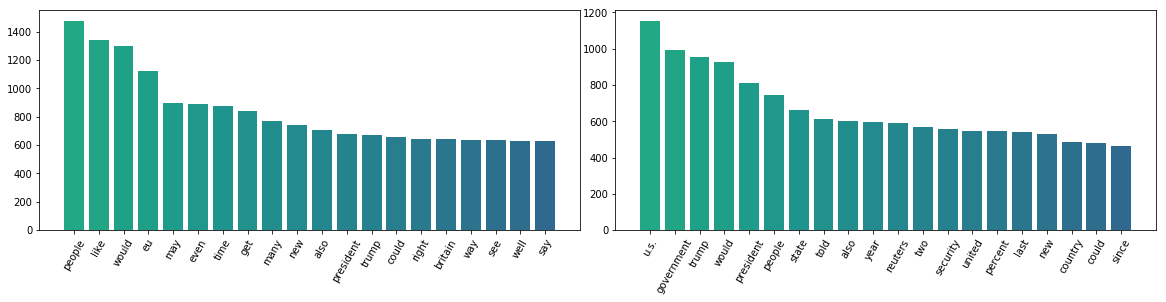

In [479]:
new_figure = plt.figure(figsize=(16,4))

ax = new_figure.add_subplot(121)
ax2 = new_figure.add_subplot(122)

# Generate a line plot on first axes
ax.bar(satire_bar_words, satire_bar_counts, color=color)
# ax.plot(colormap='PRGn')

# Draw a scatter plot on 2nd axes
ax2.bar(not_satire_bar_words, not_satire_bar_counts, color=color )


for ax in new_figure.axes:
    plt.sca(ax)
    plt.xticks(rotation=60)

plt.tight_layout(pad=0)

plt.savefig('word count bar graphs.png')

plt.show()


### word clouds

In [375]:
# !pip install wordcloud

In [376]:
# dictionary = dict(zip(keys, values))
satire_dictionary = dict(zip(satire_bar_words, satire_bar_counts))
not_satire_dictionary = dict(zip(not_satire_bar_words, not_satire_bar_counts))

In [382]:
# satire_dictionary

In [384]:
from wordcloud import WordCloud

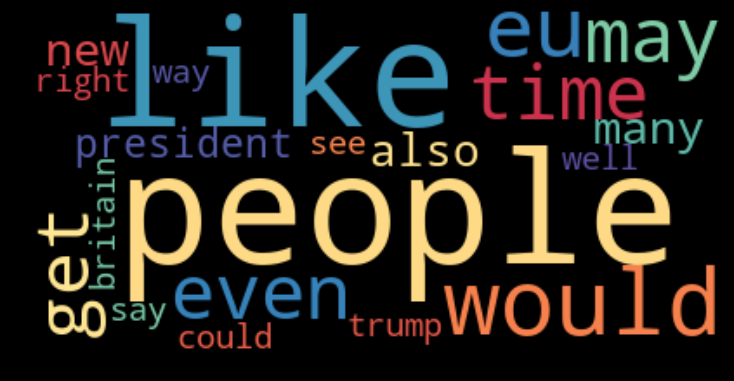

In [452]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(satire_dictionary)

# Display the generated image:
# the matplotlib way:
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('satire_wordcloud.png')

plt.show()

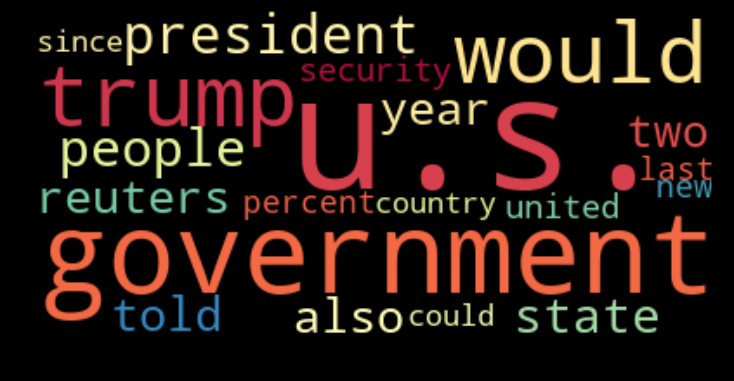

In [510]:
wordcloud = WordCloud(colormap='Spectral').generate_from_frequencies(not_satire_dictionary)

# Display the generated image:
# the matplotlib way:
# import matplotlib.pyplot as plt
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig('not_satire_wordcloud.png')
# plt.savefig('wordcloud_test.png', facecolor='k', bbox_inches='tight')

plt.show()

Colormap spectral is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

In [398]:
# bad = [‘cabernet’, ‘syrah’, ‘sauvignon’, ‘well’, ‘pinot’, ‘franc’, ‘petit’, ‘verdot’]

# wc = WordCloud(background_color= 'black', width=400, 
#                height=200, font_step=4,max_words=100, relative_scaling=0.5, 
#                normalize_plurals=False).generate_from_frequencies(satire_dictionary)
# plt.figure(figsize=(12,6))
# plt.imshow(wc);

### bi-grams

In [ ]:
# bigram_measures = nltk.collocations.BigramAssocMeasures()
# macbeth_finder = BigramCollocationFinder.from_words(macbeth_sw)
# macbeth_scored = macbeth_finder.score_ngrams(bigram_measures.raw_freq)

In [300]:
# macbeth_scored[:15]

In [305]:
satire_bigram_measures = nltk.collocations.BigramAssocMeasures()
satire_finder = BigramCollocationFinder.from_words(flat_satire)
satire_scored = satire_finder.score_ngrams(satire_bigram_measures.raw_freq)

In [306]:
satire_scored[:10]

[(('theresa', 'may'), 0.0010602635612258467),
 (('satirewire.com', '—'), 0.0005143852920798662),
 (('prime', 'minister'), 0.0005038876330578281),
 (('united', 'states'), 0.0004409016789255996),
 (('white', 'house'), 0.0004304040199035615),
 (('donald', 'trump'), 0.00041640714120751073),
 (('every', 'day'), 0.0003709172854453457),
 (('new', 'york'), 0.0003499219674012695),
 (('jeremy', 'corbyn'), 0.00032892664935719334),
 (('even', 'though'), 0.0003149297706611426)]

In [308]:
not_satire_bigram_measures = nltk.collocations.BigramAssocMeasures()
not_satire_finder = BigramCollocationFinder.from_words(flat_not_satire)
not_satire_scored = not_satire_finder.score_ngrams(not_satire_bigram_measures.raw_freq)

In [309]:
not_satire_scored[:10]

[(('united', 'states'), 0.0019527386525596093),
 (('islamic', 'state'), 0.001161499094639352),
 (('donald', 'trump'), 0.0010854183679162503),
 (('15', 'minutes'), 0.0010803463194680436),
 (('2019', 'reuters'), 0.00107020222257163),
 (('complete', 'list'), 0.00107020222257163),
 (('delayed', 'minimum'), 0.00107020222257163),
 (('delays', '©'), 0.00107020222257163),
 (('exchanges', 'delays'), 0.00107020222257163),
 (('list', 'exchanges'), 0.00107020222257163)]

### mutual info scores

In [ ]:
# macbeth_pmi_finder = BigramCollocationFinder.from_words(macbeth_sw)
# macbeth_pmi_finder.apply_freq_filter(5)
# macbeth_pmi_scored = macbeth_pmi_finder.score_ngrams(bigram_measures.pmi)

In [ ]:
# macbeth_pmi_scored[:15]

In [311]:
satire_pmi_finder = BigramCollocationFinder.from_words(flat_satire)
satire_pmi_finder.apply_freq_filter(5)
satire_pmi_scored = satire_pmi_finder.score_ngrams(satire_bigram_measures.pmi)

In [312]:
satire_pmi_scored[:15]

[(('amrika', 'jendah'), 15.80260723750677),
 (('ku', 'klux'), 15.80260723750677),
 (('modus', 'operandi'), 15.80260723750677),
 (('rigor', 'mortis'), 15.80260723750677),
 (('augurs', 'bode'), 15.539572831672974),
 (('klux', 'klan'), 15.539572831672974),
 (('carte', 'blanche'), 15.317180410336526),
 (('mes', 'amis'), 15.317180410336526),
 (('priti', 'patel'), 15.317180410336526),
 (('bla', 'bla'), 15.276538425839181),
 (('anna', 'soubry'), 15.124535332394128),
 (('arnold', 'schwarzenegger'), 14.95461033095182),
 (('null', 'void'), 14.80260723750677),
 (('sub', 'saharan'), 14.80260723750677),
 (('twin', 'towers'), 14.665103713756833)]

In [313]:
not_satire_pmi_finder = BigramCollocationFinder.from_words(flat_not_satire)
not_satire_pmi_finder.apply_freq_filter(5)
not_satire_pmi_scored = not_satire_pmi_finder.score_ngrams(not_satire_bigram_measures.pmi)

In [316]:
not_satire_pmi_scored[:15]

[(('fanny', 'potkin'), 15.267071948270647),
 (('gerauds', 'wilfried'), 15.267071948270647),
 (('mirza', 'fakhrul'), 15.267071948270647),
 (('nakhon', 'si'), 15.267071948270647),
 (('nidal', 'almughrabi'), 15.267071948270647),
 (('rupam', 'jain'), 15.267071948270647),
 (('serajul', 'quadir'), 15.267071948270647),
 (('sheikha', 'latifa'), 15.267071948270647),
 (('si', 'thammarat'), 15.267071948270647),
 (('srey', 'heng'), 15.267071948270647),
 (('737', 'max'), 15.004037542436851),
 (('andrey', 'kuzmin'), 15.004037542436851),
 (('du', 'dimanche'), 15.004037542436851),
 (('joko', 'widodo'), 15.004037542436851),
 (('kirsten', 'donovan'), 15.004037542436851)]

# additions

In [ ]:
print(metrics.classification_report(test_labels, test_predictions, 
                              target_names=twenty_test.target_names))

In [ ]:
from sklearn.metrics import roc_curve, auc
# scikit learns built in roc_curve method returns the fpr,
# tpr and thresholds
# for various decision boundaries given the case 
# member probabilites

#First calculate the probability scores of 
# each of the datapoints:

# y_score = logreg.fit(X_train, y_train).decision_function(X_test)

# fpr, tpr, thresholds = roc_curve(y_test, y_score)
# print(fpr, '\n\n', tpr, '\n\n',thresholds)

# y_score = model_log.decision_function(X_test)

# print('AUC: {}'.format(auc(fpr, tpr)))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Seaborns Beautiful Styling
sns.set_style("darkgrid", {"axes.facecolor": ".9"})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### notes saved for "just in case" moment

In [ ]:
# wed_list = []

# for idx, article in enumerate(data):
# #     print(idx)
#     new_art = process_article(article)
#     wed_list.append((article, idx))
#     print(idx)

# tokens = nltk.word_tokenize(data[0])
# removed = []
# for token in tokens: 
#     if token.lower() not in sw_set: 
#         removed.append(token.lower())
# removed 


# tokens = nltk.word_tokenize(text_test)
# tokens
# stopwords_removed = [token.lower() for token in tokens if token.lower() not in sw_set]
# stopwords_removed